- <a target="_blank" href="https://www.analyticsvidhya.com/blog/2018/03/essentials-of-deep-learning-visualizing-convolutional-neural-networks/">Essentials of Deep Learning: Visualizing Convolutional Neural Networks in Python</a>

In [44]:
import os
import sys
import shutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

# Setting

In [77]:
title = "visualize_weight__mnist_cnn"

In [78]:
print(sys.version)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


## Path

In [79]:
HOME = Path(os.getcwd()).parent

model_Path = HOME / "model"
dire = model_Path
print(os.path.exists(str(dire)))
print(dire)

True
/home/sugihiro/workdir/git/github/visualize_deep_learning_weights/model


# Data

In [57]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [58]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# Model

In [59]:
#from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [60]:
batch_size = 128
num_classes = 10
epochs = 12

In [61]:
# input image dimensions
(img_rows, img_cols) = x_train.shape[1:]
print((img_rows, img_cols))

(28, 28)


In [62]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [63]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [64]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### model

In [65]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='preds'))

In [66]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### Fit

In [67]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.2595 - acc: 0.9202 - val_loss: 0.0618 - val_acc: 0.9812
Epoch 2/12
60000/60000 [==============================] - 243s 4ms/step - loss: 0.0892 - acc: 0.9732 - val_loss: 0.0400 - val_acc: 0.9868
Epoch 3/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0647 - acc: 0.9806 - val_loss: 0.0364 - val_acc: 0.9869
Epoch 4/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0537 - acc: 0.9835 - val_loss: 0.0324 - val_acc: 0.9884
Epoch 5/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0464 - acc: 0.9856 - val_loss: 0.0291 - val_acc: 0.9894
Epoch 6/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0420 - acc: 0.9872 - val_loss: 0.0274 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0375 - acc: 0.9888 - val_loss: 0.0270 - 

### Save fitted model

In [80]:
model.save(str(model_Path / (title + "__mnist.h5")))

In [81]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 16.109590814208985
Test accuracy: 0.9911


## Load fitted model

In [82]:
model = keras.models.load_model(str(model_Path / (title + "__mnist.h5")))

# Vis CNN

## Preliminary Methods

### Plotting model architecture

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

### Visualize Filter

In [93]:
layer_num = 0
layer_weights = model.layers[layer_num].get_weights()[0]
#print(model.layers[1].get_weights()[0].shape)
print("""{0}
filter_w : {1},
filter_h : {2},
filter_c : {3} (=input_c),
output_c : {4} (=#filter)
""".format(
    layer_weights.shape,
    layer_weights.shape[0],
    layer_weights.shape[1],
    layer_weights.shape[2],
    layer_weights.shape[3]
))

#print(layer_weights[:, :, :, 0])
print(layer_weights[:, :, :, 0].squeeze().shape)
print(layer_weights[:, :, :, 0].squeeze())

(3, 3, 1, 32)
filter_w : 3,
filter_h : 3,
filter_c : 1 (=input_c),
output_c : 32 (=#filter)

(3, 3)
[[-0.37609532 -0.4172244  -0.10723199]
 [ 0.06648836  0.04850326  0.23077306]
 [ 0.17470393  0.26785794 -0.01077782]]


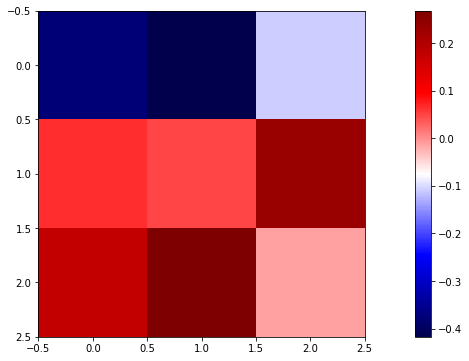

In [105]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
mappable = ax.imshow(layer_weights[:, :, :, 0].squeeze(),
                     #cmap='gray',   # <-- (min,max)=(black, white)
                     cmap='seismic',  # <-- (min,max)=(white, black)
                     )
fig.colorbar(mappable, ax=ax)
    # How to plot
    # ref: 
    #    - https://matplotlib.org/examples/color/colormaps_reference.html
    #    - https://stackoverflow.com/questions/42656585/barplot-colored-according-a-colormap
    #    - https://stackoverflow.com/questions/32462881/add-colorbar-to-existing-axis

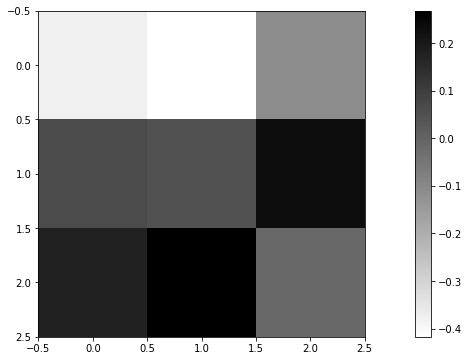

In [108]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
mappable = ax.imshow(layer_weights[:, :, :, 0].squeeze(),
                     #cmap='gray',   # <-- (min,max)=(black, white)
                     cmap='binary',  # <-- (min,max)=(white, black)
                     )
fig.colorbar(mappable, ax=ax)

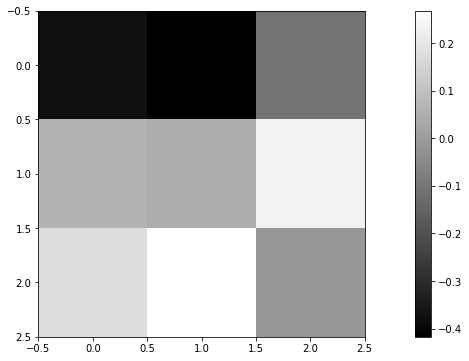

In [109]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
mappable = ax.imshow(layer_weights[:, :, :, 0].squeeze(),
                     cmap='gray',    # <-- (min,max)=(black, white)
                     #cmap='binary',  # <-- (min,max)=(white, black)
                     )
fig.colorbar(mappable, ax=ax)

>Generally, we see that the low level filters work as edge detectors, and as we go higher, they tend to capture high level concepts like objects and faces.

>一般的に最初の方のフィルターはエッジ検出の役割を果たし、層が深くなるほど人の人の顔のようなハイレベルな概念を捉える傾向が知られている。

## Activation Maps

### Maximal Activation
ニューラルネットが何をしているのかを知るために入力画像を噛ませる.

In [75]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

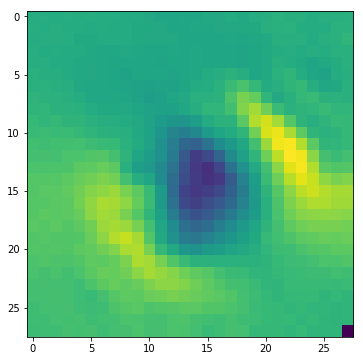

In [76]:
# Utility to search for layer index by name.
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

# This is the output node we want to maximize.
filter_idx = 0
img = visualize_activation(model, layer_idx, filter_indices=filter_idx)
plt.imshow(img[..., 0])